In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags

In [96]:
sin = np.sin
pi = np.pi
e = np.exp

tau = 365
A = 10 #(K) = 10ºC
B = 12 #(K) = 12ºC
z = np.linspace(0,20,21) #20m
#print(z)
temp = 11 #(K) = 11ºC  #temp below the surface
D = 0.1 #m**2/day

t = np.linspace(0,3650,366)  #days = 10 years
#print(len(t))
dz = 1 #m
dt = 10 #days

CD = D*dt/dz**2

Tt = A+B*sin(2*pi*t/tau) #given eqn


In [47]:
#1.a

data = np.array([-0.5*CD*np.ones(21), (1+CD)*np.ones(21), -0.5*CD*np.ones(21)])
diags = np.array([-1,0,1])
M = spdiags(data,diags,19,19).toarray()

data2 = np.array([0.5*CD*np.ones(21), (1-CD)*np.ones(21), 0.5*CD*np.ones(21)])
diags2 = np.array([-1,0,1])
M2 = spdiags(data2,diags2,19,19).toarray()

# M[0,0] = -0.5
# M[0,1] = 1
# M[-1,-1] = 1
# M[-1,-2] = 0

# M2[0,0] = 0.5
# M2[0,1] = 1
# M2[-1,-1] = 1
# M2[-1,-2] = 0
'''
g = 0
for num in t:
    Tt = A+B*sin(2*pi*num/tau)
    R = np.zeros((21,365))
    R[0,g] = Tt
    g += 1
    if g >= 21:
        break
'''
R = np.zeros((19,366))
Tk = np.zeros((19,366))

Tb = np.zeros((19,366))

R[:,0] = 10

Tb[0,:] = Tt
Tb[-1,:] = 11

#print((R))
for i in range(0,len(t)-1):
#     Tb[0] = Tt[i]
#     Tb[-1] = 283.15
#     Tb1[0] = Tt[i+1]
#     Tb1[-1] = 283.15
    R[:,i+1] = np.linalg.inv(M)@(M2@R[:,i]+(0.5*CD)*Tb[:,i]-(-0.5*CD)*Tb[:,i+1]) #R is T(k+1)

Tf = np.zeros((21,366))
Tf[0,:] = Tb[0,:]
Tf[1:-1] = R[0:,:]
Tf[-1,:] = Tb[-1,:]
print(Tf)
#R[0,:] = Tt
#R[-1,:] = 284.15 

#R

[[10.         12.05551773 14.0502748  ...  5.9497252   7.94448227
  10.        ]
 [10.         10.00025688 10.00101978 ...  9.99817748  9.99741569
   9.99716044]
 [10.         10.00000003 10.00000019 ... 10.00132786 10.00132666
  10.00132534]
 ...
 [10.         10.00000003 10.00000012 ... 10.00365675 10.00367575
  10.00369479]
 [10.         10.00024994 10.00049975 ... 10.08309975 10.08330906
  10.08351827]
 [11.         11.         11.         ... 11.         11.
  11.        ]]


In [41]:
#plt.plot(z,Tf)

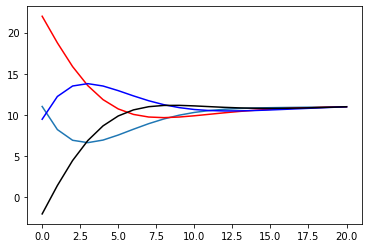

In [42]:
#1.b
'''
#print(T[:,-1]) #data for year 10
tnew = np.linspace(3285,3650,4)

Ttnew = A+B*sin(2*pi*tnew/tau)
Rnew = np.zeros((21,4))
Rnew[0,:] = Ttnew
Rnew[-1,:] = 284.15 
#print((Rnew))
Tnew = np.linalg.inv(M)@M2@Rnew
plt.plot(z,Tnew)
'''

Tnew1 = Tf[:,329]  #jan
Tnew2 = Tf[:,338]  #apr
Tnew3 = Tf[:,347]  #jul
Tnew4 = Tf[:,356]  #oct

plt.plot(z,Tnew1)
plt.plot(z,Tnew2,'r')
plt.plot(z,Tnew3,'b')
plt.plot(z,Tnew4,'k')

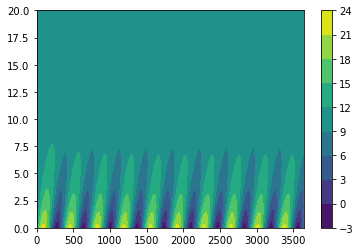

In [43]:
#1.c

plt.contourf(t,z,Tf)
plt.colorbar()

This graph shows the cyclic motion of the temperature changes over tthe course of ten years. The temperature is stable and virtually unchanging deeper than 7.5m. The temperature seems to cycle between warmer and cooler temperatures every six months (seasonal variability). The temperature seasonal variability also varies a lot more as you get closer to the surface. The seasonal variability can also be seen/confirmed in the previous graph from 1b.

In [94]:
#2.a

u = 0.001 #km/s
n=1001
x = np.linspace(0,2000,n) #km
dt = 1
dx = 2
CD = u*dt/dx**2


Jxt = e(-0.0001*(x-300)**2)



data = np.array([CD*np.ones(n), (1-2*CD)*np.ones(n), CD*np.ones(n)])
diags = np.array([-1, 0, 1])
M = spdiags(data, diags, n, n).toarray()

M[0,0] = 1-2*CD
M[0,1] = CD
M[-1,-1] = 1
M[-1,-2] = 0

djdx = np.array(n)
djdt = -u*djdx
M

h = np.zeros((n,1001))
h[0,:] = Jxt

# Fknown = np.zeros(n)
# Fknown[0] = Jxt

for k in np.arange(0,1001-1):
    hnew = np.matmul(M,h[:,k])
    h[:,k+1] = hnew.transpose()
h


[   0.    2.    4. ... 1996. 1998. 2000.]


array([[1.23409804e-04, 1.23348099e-04, 1.23286433e-04, ...,
        7.72733967e-05, 7.72395329e-05, 7.72056886e-05],
       [0.00000000e+00, 3.08524510e-08, 6.16740496e-08, ...,
        1.90915157e-05, 1.91018803e-05, 1.91122322e-05],
       [0.00000000e+00, 0.00000000e+00, 7.71311276e-12, ...,
        2.36817463e-06, 2.37181243e-06, 2.37545113e-06],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]


<ipython-input-112-dfc2b68c2649>:27: RuntimeWarning: overflow encountered in matmul
  hnew = np.matmul(Mc,h[:,kc])
<ipython-input-112-dfc2b68c2649>:27: RuntimeWarning: invalid value encountered in matmul
  hnew = np.matmul(Mc,h[:,kc])


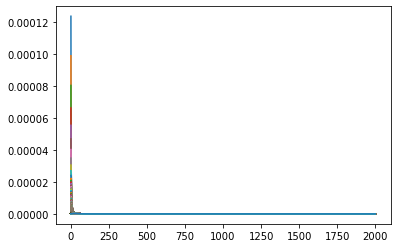

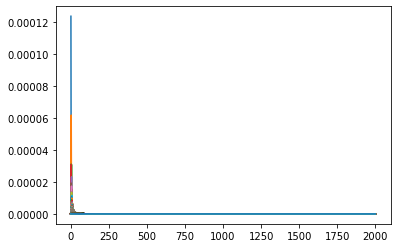

/Users/aria/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:2563: RuntimeWarning: overflow encountered in double_scalars
  delta = (x1t - x0t) * margin


IndexError: index 0 is out of bounds for axis 0 with size 0

In [112]:
#2.b
#C = 0.1

o=0
tf = 2.592*10**6 #seconds
C = [0.1,0.5,1.2]
month = np.arange(0,31)
print(month)
for c in C:

    datac = np.array([c*np.ones(n), (1-2*c)*np.ones(n), c*np.ones(n)])
    diagsc = np.array([-1, 0, 1])
    Mc = spdiags(datac, diagsc, n, n).toarray()

    Mc[0,0] = 1-2*c
    Mc[0,1] = c
    Mc[-1,-1] = 1
    Mc[-1,-2] = 0

    h = np.zeros((n,1001))
    h[0,:] = Jxt

    # Fknown = np.zeros(n)
    # Fknown[0] = Jxt
    for day in month:
        for kc in np.arange(0,1001-1):
            hnew = np.matmul(Mc,h[:,kc])
            h[:,kc+1] = hnew.transpose()
    plt.figure(o)
    o+=1
    plt.plot(x,h)
plt.show()


In [118]:
#2.c

D = 100 #m^2/s
xbc = 2000
Co = 0.5

dat = np.array([(-Co/2)*np.ones(n), (CD)*np.ones(n), (-2)*np.ones(n)])
dia = np.array([-1, 0, 1])
M1 = spdiags(dat, dia, n, n).toarray()

dat2 = np.array([(Co/2)*np.ones(n), (CD)*np.ones(n), (0)*np.ones(n)])
dia2 = np.array([-1, 0, 1])
M2 = spdiags(dat2, dia2, n, n).toarray()

Tb = np.zeros((1001,30))
tvec = np.ones(30)
Tb[0:,] = Jxt*tvec

newmat = np.zeros((1001,30))

for i in range(0,len(newmat)-1):
    newmat[:,i+1] = np.linalg.inv(M1)@(M2@newmat[:,i]+(0.5*CD)*Tb[:,i]-(-0.5*CD)*Tb[:,i+1]) #R is T(k+1)
Jnew = np.zeros(1001,30)
Jnew[1:-1] = newmat[0:,:]


ValueError: operands could not be broadcast together with shapes (1001,) (30,) 

In [114]:
#2.d
for c in C:
    for day in month:
        plt.plot(t,Jnew[day])
    plt.show()

NameError: name 'Jnew' is not defined

In [115]:
#2.e
Diffusivity = [1,100,1000] #m^2/s
Ce = 1
for d in Diffusivity:
    x = 2000
    Jnew
    plt.plot(t,Jnew)

NameError: name 'Jnew' is not defined

Knowing the turbulent diffusivity of the ocean is important because this is the main mechanism by which chemicals are mixed in the surface waters. This is important to know and understand in order to understand data from (for example, in this case) a chemical spill and how the chemical will spread throughout the depth profile and the rest of the ocean, and therefore affect marine organisms.